In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

# Eligible companies set creation

In [2]:
FillList = [
    # "revenue",
    "employees",
    "asset",
    "nppe",
    "intan",
    "capex",
    "age",
    "cap_inten",
    "gmar",
    "leverage",
    "energy_consumed",
    "energy_produced",
    "lt_debt",
    "gppe",
    "accu_dep",
    "cogs",
    "ebit",
    "ebitda",
]

LogList = [
    "revenue",
    "capex",
    "gppe",
    "nppe",
    "accu_dep",
    "intan",
    "cogs",
    "employees",
    "asset",
    "lt_debt",
    "cf1",
    "cf2",
    "cf3",
    "cf123",
    "energy_consumed",
    "energy_produced",
    "ebit",
    "ebitda",
]

In [3]:
sector_classification = "gics_name" # "NAICSInd"

In [4]:
df_refinitiv = pd.read_parquet("../data/raw_data/CGEE_preprocessed_dataset_2023.parquet")
print(df_refinitiv.shape)
df_refinitiv.columns

(596977, 56)


Index(['company_id', 'company_name', 'isin', 'ticker', 'country_hq',
       'gics_sector', 'gics_group', 'gics_ind', 'gics_sub_ind', 'gics_name',
       'fiscal_year', 'ref_cf1', 'ref_cf2', 'ref_cf3', 'ref_cf123', 'revenue',
       'ebitda', 'ebit', 'capex', 'gppe', 'nppe', 'accu_dep', 'intan', 'cogs',
       'gmar', 'asset', 'lt_debt', 'employees', 'energy_produced',
       'energy_consumed', 'cdp_cf1', 'cdp_cf2_location', 'cdp_cf2_market',
       'cdp_cf3', 'cdp_cf123', 'boundary', 'covered_countries', 'cf1', 'cf2',
       'cf3', 'cf123', 'co2_law', 'co2_scheme', 'co2_status', 'co2_coverage',
       'start_year', 'status', 'price', 'area', 'year', 'fuel_intensity',
       'income_group', 'region', 'age', 'cap_inten', 'leverage'],
      dtype='object')

In [5]:
df_refinitiv_filtered_soft = df_refinitiv[(df_refinitiv.cf1>0) | (df_refinitiv.cf2>0) | (df_refinitiv.cf3>0)]

In [6]:
np.random.seed = 1
seed = 1
df_refinitiv_filtered = df_refinitiv[df_refinitiv.fiscal_year>2010]
df_refinitiv_filtered = df_refinitiv_filtered[df_refinitiv_filtered[sector_classification].notna()]
df_refinitiv_filtered = df_refinitiv_filtered[(df_refinitiv_filtered.cf1>0) & (df_refinitiv_filtered.cf2>0) & (df_refinitiv_filtered.cf3>0)]
df_refinitiv_filtered["country_sector"] = df_refinitiv_filtered["country_hq"].astype(str) + "_" + df_refinitiv_filtered[sector_classification].astype(str)

df_refinitiv_filtered.shape

(19010, 57)

# Test company selection

In [7]:
df_refinitiv_filtered.drop_duplicates("company_id")["country_sector"].value_counts()
# shape : 19010, 1765 combinations availables (among 75 x 162 = 12150 possible)

Japan_Automotive Parts & Equipment                    27
United States of America_Application Software         27
United Kingdom_Asset Management & Custody Banks       27
Taiwan_Semiconductors                                 22
Japan_Industrial Machinery & Supplies & Components    21
                                                      ..
Nigeria_Oil & Gas Exploration & Production             1
Turkey_Specialty Chemicals                             1
Chile_Marine Ports & Services                          1
United States of America_Diversified REITs             1
Finland_Interactive Home Entertainment                 1
Name: country_sector, Length: 1765, dtype: int64

In [8]:
count_country_sector = df_refinitiv_filtered["country_sector"].value_counts()
df_refinitiv_filtered_shuffled = df_refinitiv_filtered.sample(frac=1, random_state=seed)
lst_companies = []
for combi in count_country_sector.index : 
    companies_temp = df_refinitiv_filtered_shuffled[df_refinitiv_filtered_shuffled.country_sector==combi].company_id.unique().tolist()
    lst_companies+=companies_temp[:1]
    # if len(companies_temp) > 1 : 
    #     lst_companies.append(companies_temp[1])
len(lst_companies)
# 1 : 1765 2 : 2516 4 : 3179 10 : 3770

1765

In [9]:
df_refinitiv_filtered_test = df_refinitiv_filtered[df_refinitiv_filtered.company_id.isin(lst_companies)]
print("Nb : observations : ", df_refinitiv_filtered_test.shape[0])
print("Nb : companies : ", df_refinitiv_filtered_test.drop_duplicates("company_id").shape[0])

Nb : observations :  9149
Nb : companies :  1765


# Exploration of test set

In [10]:
df_refinitiv_filtered_train = df_refinitiv_filtered[~df_refinitiv_filtered.company_id.isin(lst_companies)]

In [11]:
percent_data_taken =  (df_refinitiv_filtered_test.shape[0]) / df_refinitiv_filtered.shape[0]
percent_comapny_taken =  (df_refinitiv_filtered_test.drop_duplicates("company_id").shape[0]) / df_refinitiv_filtered.drop_duplicates("company_id").shape[0]
print("percent_data_taken (companies scope 1&2&3): ", percent_data_taken, " %")
print("percent_company_taken (companies scope 1&2&3): ", percent_comapny_taken, " %")

percent_data_taken =  (df_refinitiv_filtered_test.shape[0]) / df_refinitiv_filtered_soft.shape[0]
percent_comapny_taken =  (df_refinitiv_filtered_test.drop_duplicates("company_id").shape[0]) / df_refinitiv_filtered_soft.drop_duplicates("company_id").shape[0]
print("percent_data_taken (companies scope 1 or 2 or 3): ", percent_data_taken, " %")
print("percent_company_taken (companies scope 1 or 2 or 3): ", percent_comapny_taken, " %")

percent_data_taken (companies scope 1&2&3):  0.481273014203051  %
percent_company_taken (companies scope 1&2&3):  0.4453696694423417  %
percent_data_taken (companies scope 1 or 2 or 3):  0.25666273915726867  %
percent_company_taken (companies scope 1 or 2 or 3):  0.27267109531901745  %


In [12]:
print("shape")
scope = "cf1"
print(scope, "%.4f" % (len(df_refinitiv_filtered_test[df_refinitiv_filtered_test[scope].notna()]) / len(df_refinitiv_filtered_soft[df_refinitiv_filtered_soft[scope].notna()]))) 
scope = "cf2"
print(scope, "%.4f" % (len(df_refinitiv_filtered_test[df_refinitiv_filtered_test[scope].notna()]) / len(df_refinitiv_filtered_soft[df_refinitiv_filtered_soft[scope].notna()]))) 
scope = "cf3"
print(scope, "%.4f" % (len(df_refinitiv_filtered_test[df_refinitiv_filtered_test[scope].notna()]) / len(df_refinitiv_filtered_soft[df_refinitiv_filtered_soft[scope].notna()]))) 
scope = "cf123"
print(scope, "%.4f" % (len(df_refinitiv_filtered_test[df_refinitiv_filtered_test[scope].notna()]) / len(df_refinitiv_filtered_soft[df_refinitiv_filtered_soft[scope].notna()]))) 
print("\n")
print("nb_company")
scope = "cf1"
print(scope, "%.4f" % (df_refinitiv_filtered_test[df_refinitiv_filtered_test[scope].notna()].company_id.nunique() / df_refinitiv_filtered_soft[df_refinitiv_filtered_soft[scope].notna()].company_id.nunique()))
scope = "cf2"
print(scope, "%.4f" % (df_refinitiv_filtered_test[df_refinitiv_filtered_test[scope].notna()].company_id.nunique() / df_refinitiv_filtered_soft[df_refinitiv_filtered_soft[scope].notna()].company_id.nunique())) 
scope = "cf3"
print(scope, "%.4f" % (df_refinitiv_filtered_test[df_refinitiv_filtered_test[scope].notna()].company_id.nunique() / df_refinitiv_filtered_soft[df_refinitiv_filtered_soft[scope].notna()].company_id.nunique()))
scope = "cf123"
print(scope, "%.4f" % (df_refinitiv_filtered_test[df_refinitiv_filtered_test[scope].notna()].company_id.nunique() / df_refinitiv_filtered_soft[df_refinitiv_filtered_soft[scope].notna()].company_id.nunique())) 


shape
cf1 0.2668
cf2 0.2750
cf3 0.4235
cf123 0.4509


nb_company
cf1 0.2807
cf2 0.2865
cf3 0.4245
cf123 0.4444


In [13]:
print("Columns for which the min is in test : ") 
(df_refinitiv_filtered_train[LogList[:-7]].min() > df_refinitiv_filtered_test[LogList[:-7]].min()) 
# some min in test, unoptimal but manageable


Columns for which the min is in test : 


revenue      False
capex        False
gppe         False
nppe          True
accu_dep      True
intan        False
cogs          True
employees    False
asset         True
lt_debt      False
cf1          False
dtype: bool

In [14]:
df_refinitiv_filtered_test[FillList].mean()/df_refinitiv_filtered_train[FillList].mean() 
# no significant impact on financial indicators

employees          1.188325
asset              1.103481
nppe               1.177557
intan              1.828913
capex              1.139029
age                0.980131
cap_inten          0.767292
gmar               1.036681
leverage           1.023258
energy_consumed    1.104018
energy_produced    0.955533
lt_debt            0.942338
gppe               1.244858
accu_dep           1.295935
cogs               1.061758
ebit               0.965534
ebitda             1.039331
dtype: float64

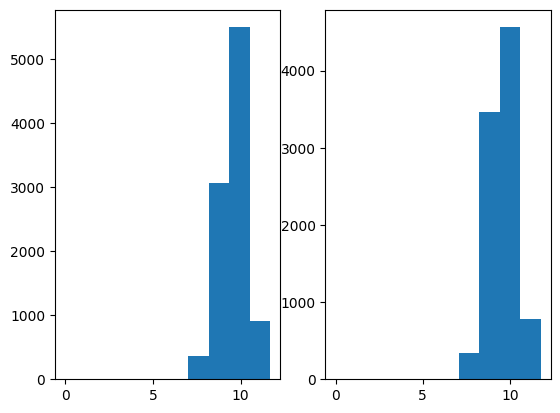

In [15]:
_, axs = plt.subplots(1, 2)
axs[0].hist(np.log10(df_refinitiv_filtered_train.revenue - df_refinitiv_filtered_train.revenue.min() + 1))
axs[1].hist(np.log10(df_refinitiv_filtered_test.revenue - df_refinitiv_filtered_test.revenue.min() + 1))
plt.show()

In [16]:
df_refinitiv_filtered.drop_duplicates("company_id").region.value_counts() / len(df_refinitiv_filtered.drop_duplicates("company_id")) * 100

Europe and Central Asia          37.042644
East Asia and Pacific            30.381024
North America                    21.826899
Latin America & the Caribbean     4.642947
South Asia                        2.977542
Sub-Saharan Africa                2.245773
Middle East and North Africa      0.883169
Name: region, dtype: float64

In [17]:
df_refinitiv_filtered_test.drop_duplicates("company_id").region.value_counts() / len(df_refinitiv_filtered_test.drop_duplicates("company_id")) * 100
# lower importance of north america and more of others

Europe and Central Asia          44.532578
East Asia and Pacific            28.441926
North America                    12.011331
Latin America & the Caribbean     7.535411
South Asia                        2.946176
Sub-Saharan Africa                2.719547
Middle East and North Africa      1.813031
Name: region, dtype: float64

In [18]:
df_refinitiv_filtered_train.drop_duplicates("company_id").region.value_counts() / len(df_refinitiv_filtered_train.drop_duplicates("company_id")) * 100

East Asia and Pacific            31.938126
Europe and Central Asia          31.028207
North America                    29.708826
South Asia                        3.002730
Latin America & the Caribbean     2.320291
Sub-Saharan Africa                1.865332
Middle East and North Africa      0.136488
Name: region, dtype: float64

In [19]:
df_refinitiv_filtered.country_hq.value_counts()/len(df_refinitiv_filtered)*100
# 40% of data are from only 3 countries! 

United States of America    19.579169
Japan                       11.588638
United Kingdom              10.941610
France                       4.229353
Germany                      3.924250
                              ...    
Estonia                      0.010521
Bahrain                      0.010521
Uganda                       0.005260
Vietnam                      0.005260
Cambodia                     0.005260
Name: country_hq, Length: 75, dtype: float64

In [20]:
df_refinitiv_filtered_train.country_hq.value_counts()/len(df_refinitiv_filtered_train)*100

United States of America      28.668492
Japan                         16.458777
United Kingdom                13.010851
Canada                         3.387080
Sweden                         3.366798
South Africa                   3.336376
Germany                        3.224825
France                         2.869891
India                          2.545381
Taiwan                         2.474394
Australia                      2.403407
Korea; Republic (S. Korea)     2.362844
Switzerland                    1.794950
Brazil                         1.663117
China                          1.358889
Netherlands                    1.095224
Norway                         1.095224
Spain                          0.993814
Thailand                       0.963391
Italy                          0.943109
Hong Kong                      0.861982
Finland                        0.811277
Malaysia                       0.699726
Ireland; Republic of           0.476625
New Zealand                    0.415779


In [21]:
(df_refinitiv_filtered_test.country_hq.value_counts()/len(df_refinitiv_filtered_test)*100) 
# Less imbalanced repartition of countries

United States of America    9.782490
United Kingdom              8.711335
Japan                       6.339491
France                      5.694611
Germany                     4.678107
                              ...   
Ukraine                     0.021860
Estonia                     0.021860
Uganda                      0.010930
Vietnam                     0.010930
Cambodia                    0.010930
Name: country_hq, Length: 75, dtype: float64

In [22]:
df_refinitiv_filtered_train.drop_duplicates("company_id").gics_name.value_counts() / len(df_refinitiv_filtered_train.drop_duplicates("company_id")) * 100

Packaged Foods & Meats                          3.730664
Industrial Machinery & Supplies & Components    3.321201
Construction & Engineering                      3.275705
Automotive Parts & Equipment                    2.684258
IT Consulting & Other Services                  2.456779
                                                  ...   
Education Services                              0.045496
Leisure Facilities                              0.045496
Telecom Tower REITs                             0.045496
Data Center REITs                               0.045496
Security & Alarm Services                       0.045496
Name: gics_name, Length: 154, dtype: Float64

In [23]:
df_refinitiv_filtered_test.drop_duplicates("company_id").gics_name.value_counts() / len(df_refinitiv_filtered_test.drop_duplicates("company_id")) * 100
# Less imbalanced repartition of sectors

Integrated Telecommunication Services    2.096317
Packaged Foods & Meats                   1.983003
Electric Utilities                       1.756374
Construction & Engineering               1.643059
Commodity Chemicals                      1.359773
                                           ...   
Single-Family Residential REITs          0.056657
Telecom Tower REITs                      0.056657
Other Specialized REITs                  0.056657
Silver                                   0.056657
Mortgage REITs                           0.056657
Name: gics_name, Length: 162, dtype: Float64

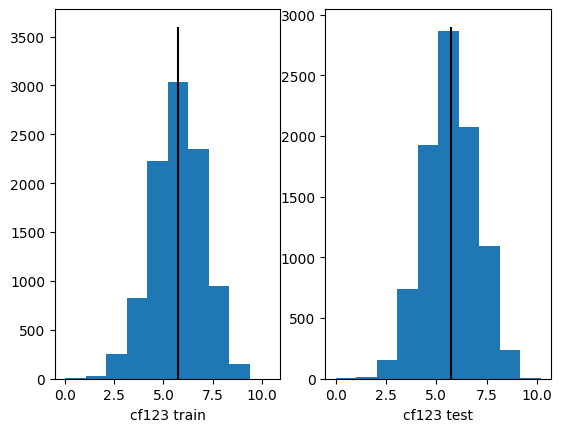

In [24]:
_, axs = plt.subplots(1, 2)
col = "cf123"
axs[0].hist(np.log10(df_refinitiv_filtered_train[col] - df_refinitiv_filtered_train[col].min() + 1))
axs[1].hist(np.log10(df_refinitiv_filtered_test[col]  - df_refinitiv_filtered_test[col].min() + 1))
axs[0].set_xlabel(col + " train")
axs[1].set_xlabel(col + " test")
axs[0].vlines(np.mean(np.log10(df_refinitiv_filtered_train[col] - df_refinitiv_filtered_train[col].min() + 1)),0,3600, color="black")
axs[1].vlines(np.mean(np.log10(df_refinitiv_filtered_test[col] - df_refinitiv_filtered_test[col].min() + 1)),0,2900, color="black")

plt.show()

In [25]:
scope = "cf3"
a = df_refinitiv_filtered_test[scope].quantile([0.01]+[i/10 for i in range(1,10)]+[0.99])
b = df_refinitiv_filtered_train[scope].quantile([0.01]+[i/10 for i in range(1,10)]+[0.99])
a/b

0.01    1.322533
0.10    0.862080
0.20    0.901230
0.30    0.905673
0.40    0.828178
0.50    0.725084
0.60    0.713326
0.70    0.711166
0.80    0.858444
0.90    0.985464
0.99    1.264953
Name: cf3, dtype: float64

# Save the test companies

In [26]:
df_refinitiv_filtered_test.company_name.drop_duplicates().to_csv("lst_companies_test.csv",index=False)